In [1]:
from pyspark.sql import SparkSession


spark = SparkSession.builder.appName("Data Analysis and Visualization").getOrCreate()


file_path = "C:/Users/bhara/Downloads/healthcare_dataset.csv"


df = spark.read.csv(file_path, header=True, inferSchema=True)

df.show(5)


+-------------+---+------+----------+-----------------+-----------------+----------------+--------------------+------------------+------------------+-----------+--------------+--------------+-----------+------------+
|         Name|Age|Gender|Blood Type|Medical Condition|Date of Admission|          Doctor|            Hospital|Insurance Provider|    Billing Amount|Room Number|Admission Type|Discharge Date| Medication|Test Results|
+-------------+---+------+----------+-----------------+-----------------+----------------+--------------------+------------------+------------------+-----------+--------------+--------------+-----------+------------+
|Bobby JacksOn| 30|  Male|        B-|           Cancer|       2024-01-31|   Matthew Smith|     Sons and Miller|        Blue Cross|18856.281305978155|        328|        Urgent|    2024-02-02|Paracetamol|      Normal|
| LesLie TErRy| 62|  Male|        A+|          Obesity|       2019-08-20| Samantha Davies|             Kim Inc|          Medicare|33

In [2]:

print("Total Rows:", df.count())
print("Total Columns:", len(df.columns))




Total Rows: 55500
Total Columns: 15


In [3]:
df.describe().show()



+-------+------------+------------------+------+----------+-----------------+-------------+--------------------+------------------+-------------------+------------------+--------------+----------+------------+
|summary|        Name|               Age|Gender|Blood Type|Medical Condition|       Doctor|            Hospital|Insurance Provider|     Billing Amount|       Room Number|Admission Type|Medication|Test Results|
+-------+------------+------------------+------+----------+-----------------+-------------+--------------------+------------------+-------------------+------------------+--------------+----------+------------+
|  count|       55500|             55500| 55500|     55500|            55500|        55500|               55500|             55500|              55500|             55500|         55500|     55500|       55500|
|   mean|        NULL| 51.53945945945946|  NULL|      NULL|             NULL|         NULL|                NULL|              NULL| 25539.316097211864| 301.1348

In [4]:
print("Columns:", df.columns)



Columns: ['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']


In [5]:
from pyspark.sql.functions import col, sum as spark_sum
df.select([spark_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()

+----+---+------+----------+-----------------+-----------------+------+--------+------------------+--------------+-----------+--------------+--------------+----------+------------+
|Name|Age|Gender|Blood Type|Medical Condition|Date of Admission|Doctor|Hospital|Insurance Provider|Billing Amount|Room Number|Admission Type|Discharge Date|Medication|Test Results|
+----+---+------+----------+-----------------+-----------------+------+--------+------------------+--------------+-----------+--------------+--------------+----------+------------+
|   0|  0|     0|         0|                0|                0|     0|       0|                 0|             0|          0|             0|             0|         0|           0|
+----+---+------+----------+-----------------+-----------------+------+--------+------------------+--------------+-----------+--------------+--------------+----------+------------+



In [6]:
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Blood Type: string (nullable = true)
 |-- Medical Condition: string (nullable = true)
 |-- Date of Admission: date (nullable = true)
 |-- Doctor: string (nullable = true)
 |-- Hospital: string (nullable = true)
 |-- Insurance Provider: string (nullable = true)
 |-- Billing Amount: double (nullable = true)
 |-- Room Number: integer (nullable = true)
 |-- Admission Type: string (nullable = true)
 |-- Discharge Date: date (nullable = true)
 |-- Medication: string (nullable = true)
 |-- Test Results: string (nullable = true)



In [7]:
df = df.dropDuplicates()

In [8]:
from pyspark.sql.functions import mean

mean_age = df.select(mean(col("Age"))).collect()[0][0]
mean_bill = df.select(mean(col("Billing Amount"))).collect()[0][0]

df = df.fillna({"Age": mean_age, "Billing Amount": mean_bill})

In [9]:
df.groupBy("Hospital").avg("Billing Amount").orderBy("avg(Billing Amount)", ascending=False).show()


+--------------------+-------------------+
|            Hospital|avg(Billing Amount)|
+--------------------+-------------------+
|    Hernandez-Morton| 52373.032374241826|
|       Walker-Garcia|  52170.03685355641|
|        Ruiz-Anthony| 52154.237721878235|
|     George-Gonzalez|  52102.24088919256|
|        Rocha-Carter| 52092.669895844054|
|Briggs Walker Mar...|  52024.72644288463|
|and Small Stephen...|  51975.96813526631|
|      Clark-Espinoza|  51848.20159668146|
|Pierce and Miller...|  51722.12273936527|
|        Stephens Ltd|  51714.30087099009|
|         Lester-Park|  51661.01203312709|
|         Stein-Watts|  51634.09983523182|
|Thomas, Clark and...|  51633.85843476792|
|Baker, Weber Patt...|  51587.93681650202|
|      Bowman-Jimenez|  51567.27767127847|
|        Perez-Wagner|  51531.96456324429|
|   Brewer-Washington|  51415.25787151488|
|       Cabrera-Baker|  51350.51280585173|
|Santiago and Russ...|  51336.22120953535|
|        Group Glover|  51316.62125631919|
+----------

In [10]:
df.groupBy("Medical Condition").count().orderBy("count", ascending=False).show()


+-----------------+-----+
|Medical Condition|count|
+-----------------+-----+
|        Arthritis| 9218|
|         Diabetes| 9216|
|     Hypertension| 9151|
|          Obesity| 9146|
|           Cancer| 9140|
|           Asthma| 9095|
+-----------------+-----+



In [11]:
df.groupBy("Admission Type").avg("Age").orderBy("avg(Age)", ascending=False).show()


+--------------+------------------+
|Admission Type|          avg(Age)|
+--------------+------------------+
|        Urgent|51.631232668152904|
|     Emergency| 51.53982985305491|
|      Elective| 51.43501326259947|
+--------------+------------------+



In [12]:
corr = df.stat.corr("Age", "Billing Amount")
print("Correlation between Age and Billing Amount:", corr)


Correlation between Age and Billing Amount: -0.003426700417461207


In [13]:
import sys
print(sys.executable)


C:\Users\bhara\myenv\Scripts\python.exe


In [14]:
!C:\Users\bhara\AppData\Local\Programs\Python\Python312\python.exe -m pip install seaborn matplotlib


The system cannot find the path specified.


In [15]:
!pip install seaborn matplotlib


In [16]:
import sys
print(sys.executable)


C:\Users\bhara\myenv\Scripts\python.exe


In [17]:
import sys
print(sys.executable)


C:\Users\bhara\myenv\Scripts\python.exe


In [18]:
!python -m ipykernel install --user --name=myenv --display-name "Python (myenv)"


Installed kernelspec myenv in C:\Users\bhara\AppData\Roaming\jupyter\kernels\myenv


In [19]:
!pip install seaborn matplotlib


In [20]:
!{sys.executable} -m pip install seaborn matplotlib


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
print("✅ Seaborn works now!")


✅ Seaborn works now!


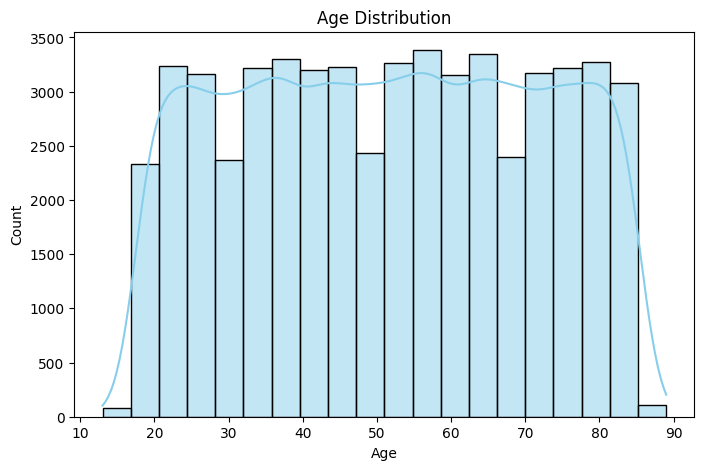

In [22]:
# Convert to Pandas DataFrame
pdf = df.toPandas()

# Now plot using Seaborn
plt.figure(figsize=(8,5))
sns.histplot(pdf['Age'], kde=True, bins=20, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


C:\Users\bhara\AppData\Local\Temp\ipykernel_21560\2496696613.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=pdf, palette='pastel')


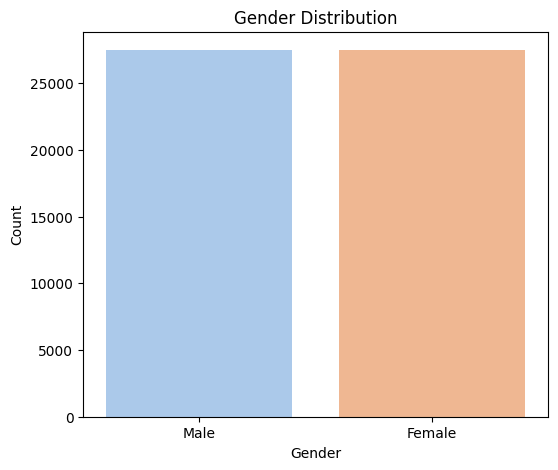

In [23]:
# Convert Spark DataFrame to Pandas
pdf = df.toPandas()

# Now use Seaborn on the Pandas DataFrame
plt.figure(figsize=(6,5))
sns.countplot(x='Gender', data=pdf, palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


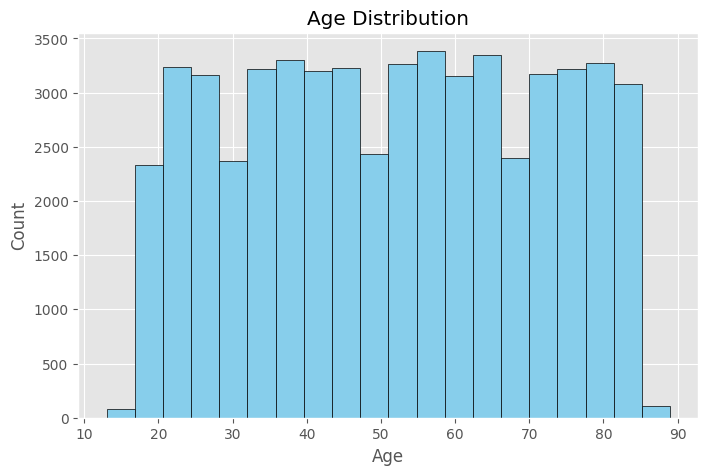

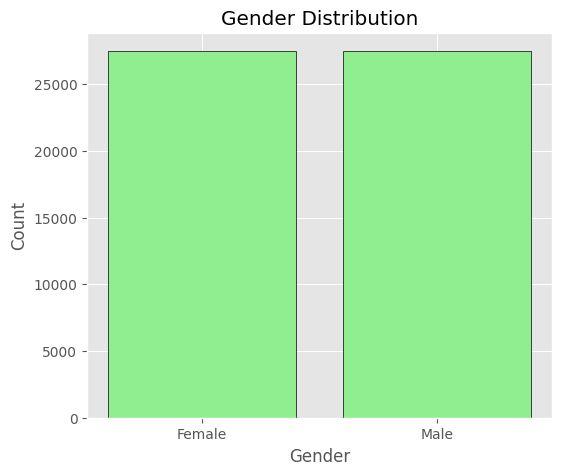

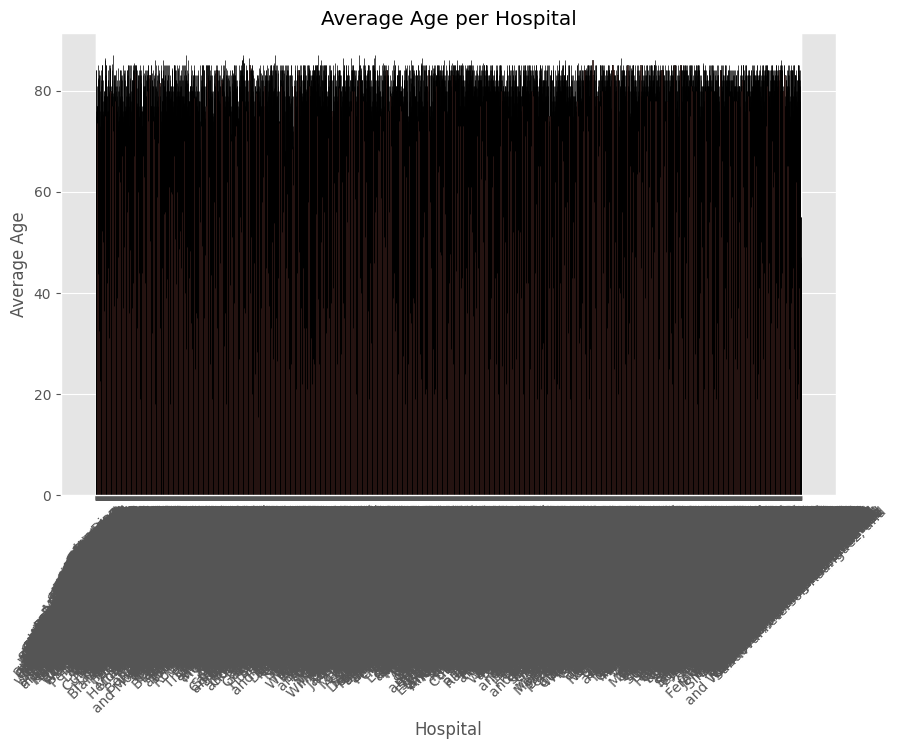

C:\Users\bhara\AppData\Local\Temp\ipykernel_21560\3810185105.py:56: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ages_lists, labels=genders, patch_artist=True,


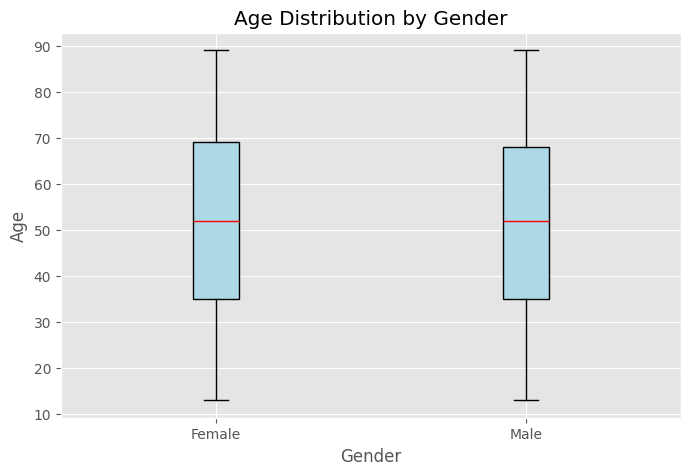

In [24]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Use a Matplotlib style similar to Seaborn
plt.style.use('ggplot')

# -----------------------------
# 1️⃣ Age Distribution (Histogram)
# -----------------------------
ages = df.select("Age").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(8,5))
plt.hist(ages, bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# -----------------------------
# 2️⃣ Gender Distribution (Bar Chart)
# -----------------------------
gender_counts = df.groupBy("Gender").count().collect()
genders = [row['Gender'] for row in gender_counts]
counts = [row['count'] for row in gender_counts]

plt.figure(figsize=(6,5))
plt.bar(genders, counts, color='lightgreen', edgecolor='black')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# -----------------------------
# 3️⃣ Average Age per Hospital (Bar Chart)
# -----------------------------
avg_age = df.groupBy("Hospital").agg(F.mean("Age").alias("avg_age")).collect()
hospitals = [row['Hospital'] for row in avg_age]
mean_ages = [row['avg_age'] for row in avg_age]

plt.figure(figsize=(10,6))
plt.bar(hospitals, mean_ages, color='salmon', edgecolor='black')
plt.title("Average Age per Hospital")
plt.xlabel("Hospital")
plt.ylabel("Average Age")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# 4️⃣ Age Distribution by Gender (Boxplot)
# -----------------------------
age_gender = df.groupBy("Gender").agg(F.collect_list("Age").alias("ages")).collect()
genders = [row['Gender'] for row in age_gender]
ages_lists = [row['ages'] for row in age_gender]

plt.figure(figsize=(8,5))
plt.boxplot(ages_lists, labels=genders, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red'))
plt.title("Age Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()
